In [42]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as skMetrics

In [47]:
df = pd.read_csv('')
df.head(10)

,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,val,upper,lower
0,Number of Smokers,1,Global,1,Male,29,15+ years,1990,8.031015e+08,8.096221e+08,7.959086e+08
1,Number of Smokers,1,Global,2,Female,29,15+ years,1990,1.891488e+08,1.930929e+08,1.855595e+08
2,Number of Smokers,1,Global,3,Both,29,15+ years,1990,9.922503e+08,1.000161e+09,9.847880e+08
3,Number of Smokers,1,Global,1,Male,29,15+ years,1991,8.138972e+08,8.200339e+08,8.069514e+08
4,Number of Smokers,1,Global,2,Female,29,15+ years,1991,1.905375e+08,1.944249e+08,1.869744e+08
5,Number of Smokers,1,Global,3,Both,29,15+ years,1991,1.004435e+09,1.011925e+09,9.969811e+08
6,Number of Smokers,1,Global,1,Male,29,15+ years,1992,8.233148e+08,8.292228e+08,8.167264e+08
7,Number of Smokers,1,Global,2,Female,29,15+ years,1992,1.919026e+08,1.957109e+08,1.884066e+08
8,Number of Smokers,1,Global,3,Both,29,15+ years,1992,1.015217e+09,1.022720e+09,1.007847e+09
9,Number of Smokers,1,Global,1,Male,29,15+ years,1993,8.313873e+08,8.372931e+08,8.249496e+08


In [44]:
df.drop(['measure_name', 'sex_name', 'age_group_name'], inplace=True, axis=1)
#sex_id : male is 1, female is 2, both is 3
df.corr()

/var/folders/mc/y_90yrrn0_94l5pj4q973y5h0000gn/T/ipykernel_87641/497183135.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,location_id,sex_id,age_group_id,year_id,val,upper,lower
location_id,1.000000e+00,4.129324e-15,NaN,-5.810115e-13,-0.159240,-0.159718,-0.158774
sex_id,4.129324e-15,1.000000e+00,NaN,-4.450544e-17,0.021650,0.021815,0.021488
age_group_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_id,-5.810115e-13,-4.450544e-17,NaN,1.000000e+00,0.007721,0.008005,0.007421
val,-1.592398e-01,2.164982e-02,NaN,7.720502e-03,1.000000,0.999976,0.999977
upper,-1.597180e-01,2.181495e-02,NaN,8.004704e-03,0.999976,1.000000,0.999907
lower,-1.587740e-01,2.148802e-02,NaN,7.421082e-03,0.999977,0.999907,1.000000


In [49]:
col = list(df.columns)
col.remove('age_group_id')
col.remove('upper')
col.remove('lower')
col.remove('val')
col.remove('location_name')
features = df[col]
target = df['val'].loc
#df.drop(index=karaoke_index, axis=1, inplace=True)

# create testing/validation/training set (20%)
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2, random_state=42)

# try linear regression model
model = LinearRegression()

model.fit(x_train, y_train)
predictions = model.predict(x_test)

print('MSE for linear regression:', skMetrics.mean_squared_error(y_true=y_test, y_pred=predictions, squared=False))
print(vars(model))

TypeError: Expected sequence or array-like, got <class 'pandas.core.indexing._LocIndexer'>

In [52]:
global_only = df[(df.location_id == 1)]
global_only
global_only

,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,val,upper,lower
0,Number of Smokers,1,Global,1,Male,29,15+ years,1990,8.031015e+08,8.096221e+08,7.959086e+08
1,Number of Smokers,1,Global,2,Female,29,15+ years,1990,1.891488e+08,1.930929e+08,1.855595e+08
2,Number of Smokers,1,Global,3,Both,29,15+ years,1990,9.922503e+08,1.000161e+09,9.847880e+08
3,Number of Smokers,1,Global,1,Male,29,15+ years,1991,8.138972e+08,8.200339e+08,8.069514e+08
4,Number of Smokers,1,Global,2,Female,29,15+ years,1991,1.905375e+08,1.944249e+08,1.869744e+08
...,...,...,...,...,...,...,...,...,...,...,...
85,Number of Smokers,1,Global,2,Female,29,15+ years,2018,1.944617e+08,2.001685e+08,1.890813e+08
86,Number of Smokers,1,Global,3,Both,29,15+ years,2018,1.138485e+09,1.150113e+09,1.125664e+09
87,Number of Smokers,1,Global,1,Male,29,15+ years,2019,9.505177e+08,9.615655e+08,9.392571e+08
88,Number of Smokers,1,Global,2,Female,29,15+ years,2019,1.943009e+08,2.004529e+08,1.885878e+08


In [59]:
df = pd.read_csv('SMOKING_1990_2019_PCT_CHANGE.csv')
df.drop(['age_group_id', 'age_group_name'], axis=1, inplace=True)
df.head(20)

,measure_name,location_id,location_name,sex_id,sex_name,val,upper,lower
0,"% Change in Number of Smokers, 1990-2019",1,Global,1,Male,0.183580,0.200438,0.166373
1,% Change in Age-Standardized Smoking Prevalenc...,1,Global,1,Male,-0.275028,-0.265055,-0.285079
2,"% Change in Number of Smokers, 1990-2019",1,Global,2,Female,0.027347,0.066359,-0.008666
3,% Change in Age-Standardized Smoking Prevalenc...,1,Global,2,Female,-0.377422,-0.354123,-0.399461
4,"% Change in Number of Smokers, 1990-2019",1,Global,3,Both,0.153779,0.169123,0.137887
5,% Change in Age-Standardized Smoking Prevalenc...,1,Global,3,Both,-0.295709,-0.286486,-0.305203
6,"% Change in Number of Smokers, 1990-2019",4,"Southeast Asia, East Asia, and Oceania",1,Male,0.292153,0.324401,0.258622
7,% Change in Age-Standardized Smoking Prevalenc...,4,"Southeast Asia, East Asia, and Oceania",1,Male,-0.165647,-0.145044,-0.186340
8,"% Change in Number of Smokers, 1990-2019",4,"Southeast Asia, East Asia, and Oceania",2,Female,0.412540,0.634433,0.204082
9,% Change in Age-Standardized Smoking Prevalenc...,4,"Southeast Asia, East Asia, and Oceania",2,Female,-0.220729,-0.109975,-0.332329


In [86]:
df = df[df.measure_name != '% Change in Age-Standardized Smoking Prevalence, 1990-2019']

df

,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,val,upper,lower
0,"% Change in Number of Smokers, 1990-2019",1,Global,1,Male,29,15+ years,0.183580,0.200438,0.166373
2,"% Change in Number of Smokers, 1990-2019",1,Global,2,Female,29,15+ years,0.027347,0.066359,-0.008666
4,"% Change in Number of Smokers, 1990-2019",1,Global,3,Both,29,15+ years,0.153779,0.169123,0.137887
6,"% Change in Number of Smokers, 1990-2019",4,"Southeast Asia, East Asia, and Oceania",1,Male,29,15+ years,0.292153,0.324401,0.258622
8,"% Change in Number of Smokers, 1990-2019",4,"Southeast Asia, East Asia, and Oceania",2,Female,29,15+ years,0.412540,0.634433,0.204082
...,...,...,...,...,...,...,...,...,...,...
1388,"% Change in Number of Smokers, 1990-2019",435,South Sudan,2,Female,29,15+ years,0.525681,1.135804,0.045734
1390,"% Change in Number of Smokers, 1990-2019",435,South Sudan,3,Both,29,15+ years,0.201091,0.368975,0.048047
1392,"% Change in Number of Smokers, 1990-2019",522,Sudan,1,Male,29,15+ years,1.021245,1.307675,0.753659
1394,"% Change in Number of Smokers, 1990-2019",522,Sudan,2,Female,29,15+ years,0.974147,1.960827,0.260124


In [32]:
male_values = df.loc[df['sex_id']=='1']['val']
female_values = df.loc[df['sex_id']=='2']['val']
print(min(df.val))

63.45716608


([<matplotlib.axis.XTick at 0x7f85f663f550>,
 [Text(1, 0, 'Male'), Text(2, 0, 'Female')])

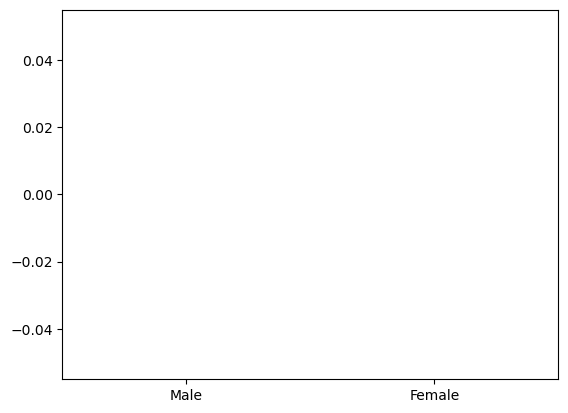

In [33]:
# plot sidebyside boxplots, hide outliers
plt.boxplot([male_values,female_values])
plt.xticks([1,2], ['Male', 'Female'])
#plt.ylim([-1,4])

In [89]:
df.drop(['measure_name','age_group_name','location_name','sex_name'], inplace=True, axis=1)
df.corr()

/var/folders/zv/npgqrjp57ygbmvyh7zhqp9hc0000gn/T/ipykernel_93146/3581304398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['measure_name','age_group_name','location_name','sex_name'], inplace=True, axis=1)


,location_id,sex_id,age_group_id,val,upper,lower
location_id,1.000000e+00,3.772125e-16,NaN,0.113371,0.132677,0.085338
sex_id,3.772125e-16,1.000000e+00,NaN,0.000133,-0.001100,0.001253
age_group_id,NaN,NaN,NaN,NaN,NaN,NaN
val,1.133709e-01,1.331020e-04,NaN,1.000000,0.980364,0.976193
upper,1.326771e-01,-1.100409e-03,NaN,0.980364,1.000000,0.914521
lower,8.533780e-02,1.253356e-03,NaN,0.976193,0.914521,1.000000
